In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sales = pd.read_csv("final/AdidasUSSalesData.csv") # import dataframe
sales.columns = sales.columns.str.replace(" ", "") # delete spaces

In [8]:
sales # display for testing

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$53.00,83,"$4,399","$1,408",32%,Outlet
1,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$68.00,83,"$5,644","$2,427",43%,Online
2,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$34.00,384,"$13,056","$6,789",52%,Outlet
3,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$47.00,336,"$15,792","$9,633",61%,Online
4,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$75.00,275,"$206,250","$61,875",30%,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$46.00,56,"$2,576","$1,005",39%,Outlet
9644,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$63.00,47,"$2,961","$1,362",46%,Online
9645,Amazon,1185732,12/31/2021,Northeast,Maine,Portland,Men's Apparel,$55.00,125,"$68,750","$17,188",25%,Outlet
9646,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$70.00,175,"$122,500","$42,875",35%,Outlet


In [9]:
sales.info() # collect info on datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Retailer         9648 non-null   object
 1   RetailerID       9648 non-null   int64 
 2   InvoiceDate      9647 non-null   object
 3   Region           9643 non-null   object
 4   State            9648 non-null   object
 5   City             9648 non-null   object
 6   Product          9648 non-null   object
 7   PriceperUnit     9644 non-null   object
 8   UnitsSold        9645 non-null   object
 9   TotalSales       9638 non-null   object
 10  OperatingProfit  9635 non-null   object
 11  OperatingMargin  9648 non-null   object
 12  SalesMethod      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [10]:
#To be able to check all the datatypes of the dataframe
sales.dtypes 

Retailer           object
RetailerID          int64
InvoiceDate        object
Region             object
State              object
City               object
Product            object
PriceperUnit       object
UnitsSold          object
TotalSales         object
OperatingProfit    object
OperatingMargin    object
SalesMethod        object
dtype: object

In [11]:
sales.iloc[6724]

Retailer           Sports Direct
RetailerID               1197831
InvoiceDate            8/23/2021
Region                     South
State                    Alabama
City                  Birmingham
Product            Men's Apparel
PriceperUnit             $25.00 
UnitsSold                    NaN
TotalSales              $68,750 
OperatingProfit         $27,500 
OperatingMargin              40%
SalesMethod               Outlet
Name: 6724, dtype: object

In [65]:
# View null rows
null_rows = sales[sales.isna().any(axis=1)]
null_rows

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod,UnitsPerSale
0,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53.0,83.0,4399.0,1408.0,0.32,Outlet,NaN
1,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68.0,83.0,5644.0,2427.0,0.43,Online,NaN
2,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34.0,384.0,13056.0,6789.0,0.52,Outlet,NaN
3,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47.0,336.0,15792.0,9633.0,0.61,Online,NaN
4,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75.0,275.0,206250.0,61875.0,0.30,Outlet,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,46.0,56.0,2576.0,1005.0,0.39,Outlet,NaN
9644,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,63.0,47.0,2961.0,1362.0,0.46,Online,NaN
9645,Amazon,1185732,2021-12-31,Northeast,Maine,Portland,Men's Apparel,55.0,125.0,68750.0,17188.0,0.25,Outlet,NaN
9646,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,70.0,175.0,122500.0,42875.0,0.35,Outlet,NaN


In [13]:
sales.nunique() # get unique value information

Retailer              6
RetailerID            4
InvoiceDate         724
Region                5
State                50
City                 52
Product               6
PriceperUnit         95
UnitsSold           361
TotalSales         3134
OperatingProfit    4183
OperatingMargin      66
SalesMethod           3
dtype: int64

In [14]:
# Turn each of the objects into floats so they can be worked with
floatConvert = ["PriceperUnit", "TotalSales", "UnitsSold", "OperatingProfit"]
for col in floatConvert:
    sales[col] = sales[col].astype(str).str.strip().str.replace("$", "", regex=False)
    sales[col] = sales[col].astype(str).str.strip().str.replace(",", "", regex=False)
    sales[col] = pd.to_numeric(sales[col], errors="coerce")

#Turning InvoiceDate to a Datetime object
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])

In [15]:
# Turn Operating Margin to percent so it can be worked with
sales["OperatingMargin"] = sales["OperatingMargin"].str.strip("%").astype("float") / 100

In [16]:
sales["PriceperUnit"] = sales["PriceperUnit"].fillna(sales["TotalSales"] / sales["UnitsSold"])
sales["UnitsSold"] = sales["UnitsSold"].fillna(sales["TotalSales"] / sales["PriceperUnit"])
sales["TotalSales"] = sales["TotalSales"].fillna(sales["PriceperUnit"] * sales["UnitsSold"])
sales["OperatingProfit"] = sales["OperatingProfit"].fillna(sales["TotalSales"] * sales["OperatingMargin"]).round(decimals = 0)


In [17]:
sales

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53.0,83.0,4399.0,1408.0,0.32,Outlet
1,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68.0,83.0,5644.0,2427.0,0.43,Online
2,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34.0,384.0,13056.0,6789.0,0.52,Outlet
3,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47.0,336.0,15792.0,9633.0,0.61,Online
4,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75.0,275.0,206250.0,61875.0,0.30,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,46.0,56.0,2576.0,1005.0,0.39,Outlet
9644,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,63.0,47.0,2961.0,1362.0,0.46,Online
9645,Amazon,1185732,2021-12-31,Northeast,Maine,Portland,Men's Apparel,55.0,125.0,68750.0,17188.0,0.25,Outlet
9646,Foot Locker,1185732,2021-12-31,Northeast,Pennsylvania,Philadelphia,Men's Apparel,70.0,175.0,122500.0,42875.0,0.35,Outlet


Text(0.5, 1.0, 'Total Sales by Product')

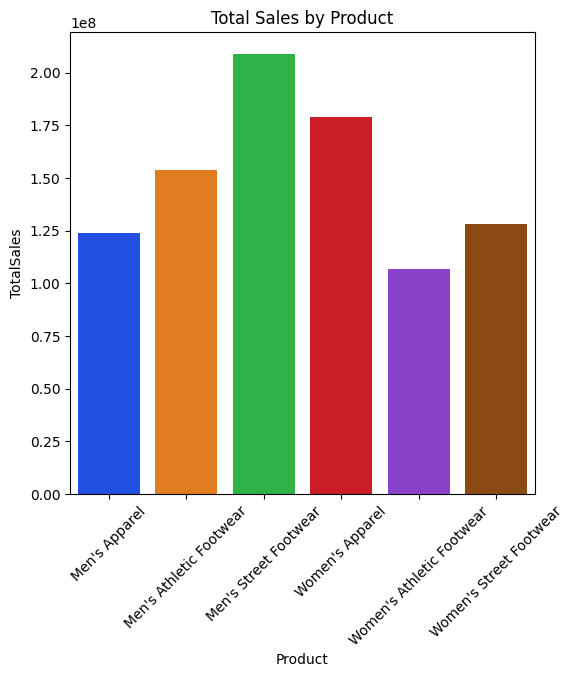

In [18]:
#Grouping the products together and agg sum of Units Sold
sales_units = sales.groupby('Product')['TotalSales'].sum().reset_index()

#Plotting Total Units Sold by Product
plt.figure(figsize=(6,6))
sns.barplot(data=sales_units, x='Product',y='TotalSales', hue='Product',palette='bright')#SeaBorn bar plot
plt.xticks(rotation=45)
plt.title('Total Sales by Product')


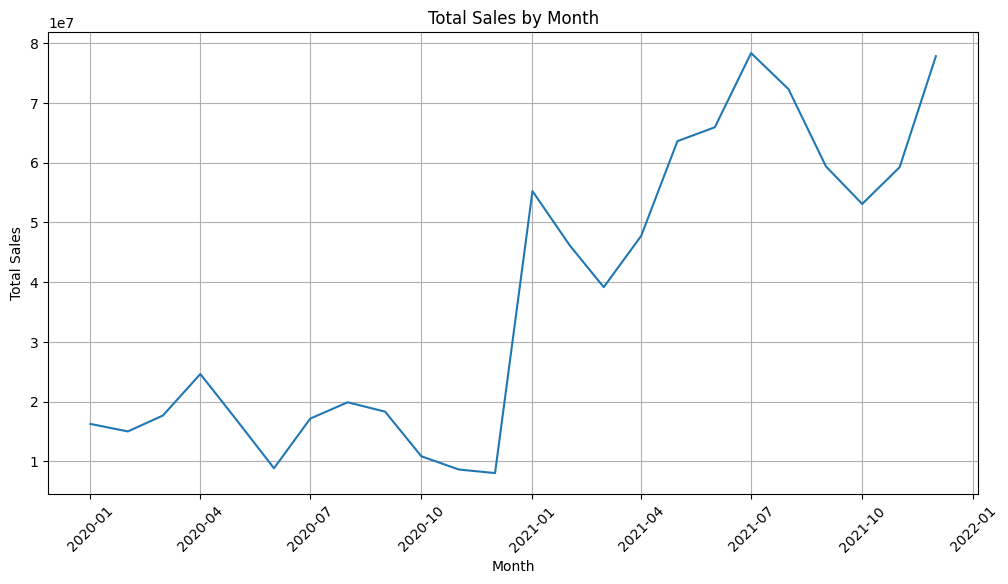

In [19]:

#Creating sales_months and dropping all the null values
sales_months = sales[['TotalSales','InvoiceDate']]
sales_months = sales_months.dropna(subset=['InvoiceDate'])

#Making column InvoiceMonth and making the dtype string
sales_months['InvoiceMonth'] = sales_months['InvoiceDate'].dt.month.astype(str)

#Making Column InvoiceYear dtype string
sales_months['InvoiceYear'] = sales_months['InvoiceDate'].dt.year.astype(str)


#All the months data is brought together and units sold is summed
sales_months = sales_months.groupby(['InvoiceMonth','InvoiceYear'])['TotalSales'].sum().reset_index()

#Creating a new column off the other two for graphing purposes
sales_months['InvoiceMonthYear'] = sales_months['InvoiceMonth'] + '-' + sales_months['InvoiceYear']
sales_months['InvoiceMonthYear'] = sales_months['InvoiceMonthYear'].astype('datetime64[s]')

#Sorting the data by the monthyear 
sales_months = sales_months[['TotalSales', 'InvoiceMonth', 'InvoiceYear', 'InvoiceMonthYear']].sort_values(by='InvoiceMonthYear', ascending=True)

#Plotting the Data
plt.figure(figsize=(12,6))
sns.lineplot(data= sales_months, x='InvoiceMonthYear', y='TotalSales')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.grid()

Text(0, 0.5, 'Total Sales')

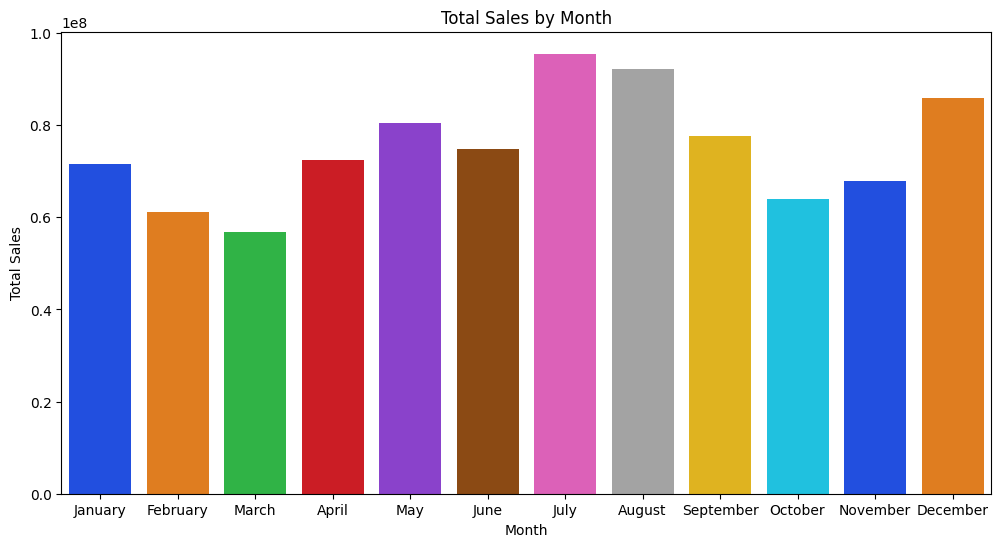

In [20]:
#Creating a map for the months
month_order = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

#Creating sales_months and dropping all the null values
sales_months = sales[['TotalSales','InvoiceDate']]
sales_months = sales_months.dropna(subset=['InvoiceDate'])

#Making column InvoiceMonth and making the dtype int
sales_months['InvoiceMonth'] = sales_months['InvoiceDate'].dt.month.astype(int)


#Grouping all the months data and summing the units sold/sorting all the data by month
sales_months = sales_months.groupby(['InvoiceMonth'])['TotalSales'].sum().reset_index()
sales_months = sales_months[['TotalSales', 'InvoiceMonth']].sort_values(by='InvoiceMonth', ascending=True).reset_index()

# Making a new column for the names and mapping them to the month numbers so we can use the names in the plot
sales_months['InvoiceMonthName'] = sales_months['InvoiceMonth'].map(month_order)

#plotting the data in a matplotlib bar plot
plt.figure(figsize=(12,6))
sns.barplot(data= sales_months, x='InvoiceMonthName', y='TotalSales', palette='bright', hue='InvoiceMonth',legend=False)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')



Text(0.5, 1.0, 'Percentage of Total Sales by Region')

<Figure size 600x600 with 0 Axes>

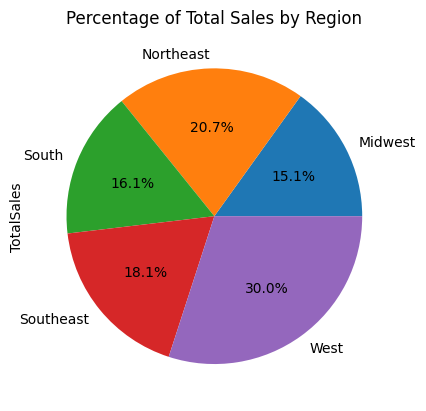

In [21]:

#Grouping the regions together and sum TotalSales
sales_region = sales.groupby('Region')['TotalSales'].sum().reset_index()

#Pie plot of the Regions%
plt.figure(figsize=(6,6))
sales_region.plot.pie(y='TotalSales', labels=sales_region['Region'],autopct='%1.1f%%',legend=False)
plt.title('Percentage of Total Sales by Region')


Text(0.5, 1.0, 'Percentage of Total Sales by Retailer')

<Figure size 600x600 with 0 Axes>

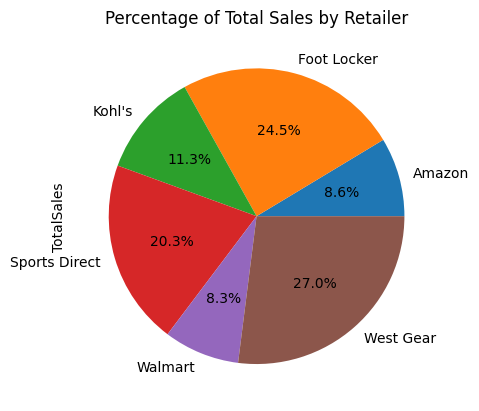

In [22]:

#Grouping the retailers together and sum TotalSales
sales_retailer = sales.groupby('Retailer')['TotalSales'].sum().reset_index()

#Pie plot of the Retailers%
plt.figure(figsize=(6,6))
sales_retailer.plot.pie(y='TotalSales', labels=sales_retailer['Retailer'],autopct='%1.1f%%',legend=False)
plt.title('Percentage of Total Sales by Retailer')


Text(0, 0.5, 'Region')

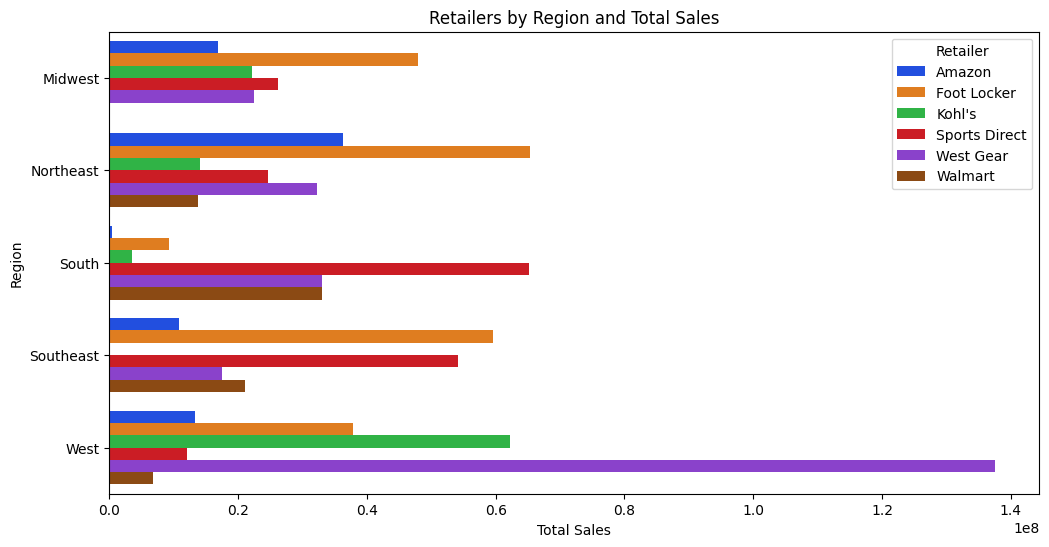

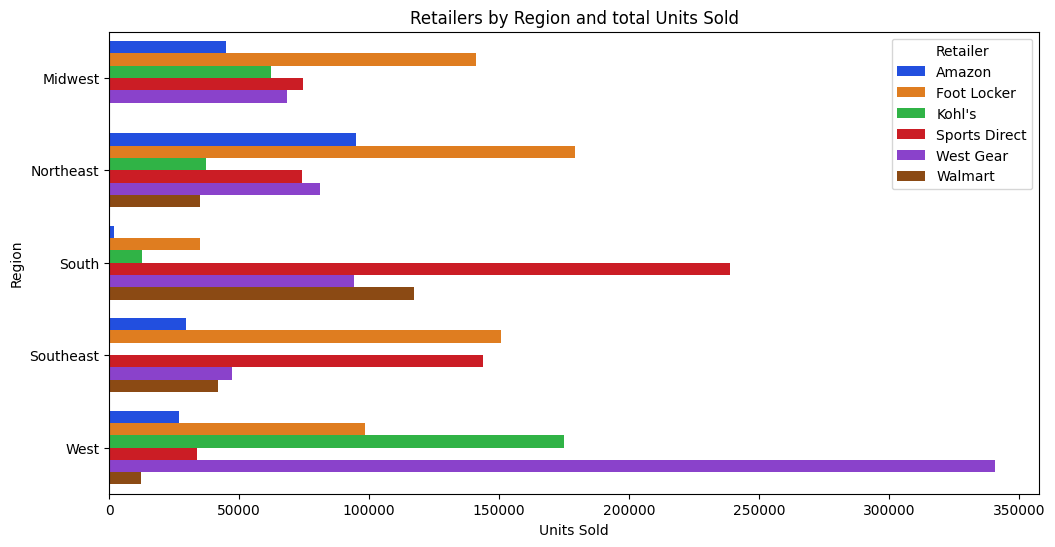

In [23]:
#histor gram hue = 'Region' (show which retailers are selling the most in each region)

sales_region_retailer = sales.groupby(['Region', 'Retailer'])['TotalSales'].sum().reset_index()
sales_region_retailer

#Plotting the data
plt.figure(figsize=(12,6))
sns.barplot(data = sales_region_retailer, x='TotalSales', y='Region', hue='Retailer', palette='bright')
plt.title('Retailers by Region and Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Region')

sales_region_retailer = sales.groupby(['Region', 'Retailer'])['UnitsSold'].sum().reset_index()
sales_region_retailer

plt.figure(figsize=(12,6))
sns.barplot(data = sales_region_retailer, x='UnitsSold', y='Region', hue='Retailer', palette='bright')
plt.title('Retailers by Region and total Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Region')


In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Retailer         9648 non-null   object        
 1   RetailerID       9648 non-null   int64         
 2   InvoiceDate      9647 non-null   datetime64[ns]
 3   Region           9643 non-null   object        
 4   State            9648 non-null   object        
 5   City             9648 non-null   object        
 6   Product          9648 non-null   object        
 7   PriceperUnit     9648 non-null   float64       
 8   UnitsSold        9648 non-null   float64       
 9   TotalSales       9648 non-null   float64       
 10  OperatingProfit  9648 non-null   float64       
 11  OperatingMargin  9648 non-null   float64       
 12  SalesMethod      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 980.0+ KB


In [25]:
#This pivot we can make a bunch of new graphs and see more data by states

#Creating a new dataframe and pivoting on State, entering in the values and the agg funciton
sales_states_pivot = sales.pivot_table(index='State', values=['TotalSales','UnitsSold','OperatingProfit','OperatingMargin','SalesMethod'], 
                                       aggfunc={'TotalSales':'sum', 'UnitsSold':'sum', 'OperatingProfit':'mean', 'OperatingMargin':'mean'})

#Fixing the Columns to make the readable
round_columns = ['OperatingMargin','OperatingProfit']
sales_states_pivot[round_columns]=sales_states_pivot[round_columns].round(2)

sales_states_pivot

#Can sort values by anything you like with this
#sales_states_pivot.sort_values(by='TotalSales' ,ascending=False)




,OperatingMargin,OperatingProfit,TotalSales,UnitsSold
State,,,,
Alabama,0.55,42349.91,17633424.0,65802.0
Alaska,0.35,31238.60,14753103.0,30815.0
Arizona,0.39,24743.88,15782221.0,46919.0
Arkansas,0.44,22757.88,12639347.0,48468.0
California,0.39,44678.66,60174133.0,163284.0
Colorado,0.43,53566.40,20996536.0,41378.0
Connecticut,0.40,19223.74,11573448.0,34696.0
Delaware,0.43,31419.15,12298412.0,30275.0
Florida,0.39,58128.39,59283714.0,139505.0


Text(0, 0.5, 'Units Sold')

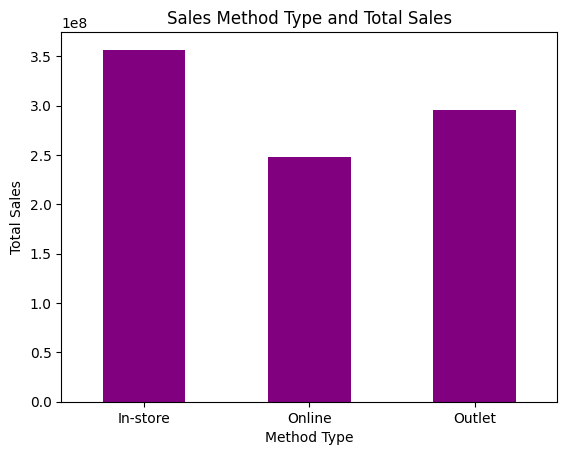

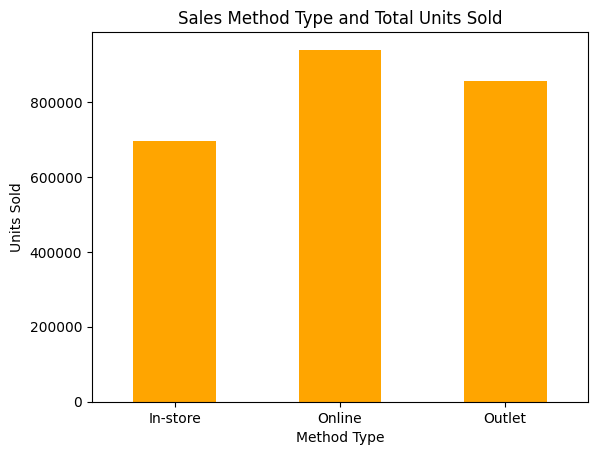

In [26]:
#Grouping the sales methods together and sum TotalSales
sales_method = sales.groupby('SalesMethod')['TotalSales'].sum().reset_index()

#Plotting the data on Total Sales so which method makes the most money
sales_method.plot.bar(x='SalesMethod',y='TotalSales',legend=False, color='purple')
plt.title('Sales Method Type and Total Sales')
plt.xlabel('Method Type')
plt.xticks(rotation=360)
plt.ylabel('Total Sales')


#Grouping the sales methods together and sum Units Sold
sales_method = sales.groupby('SalesMethod')['UnitsSold'].sum().reset_index()

#Plotting the data on Units Sold so which method moves the most units
sales_method.plot.bar(x='SalesMethod',y='UnitsSold',legend=False, color='orange')
plt.title('Sales Method Type and Total Units Sold')
plt.xlabel('Method Type')
plt.xticks(rotation=360)
plt.ylabel('Units Sold')



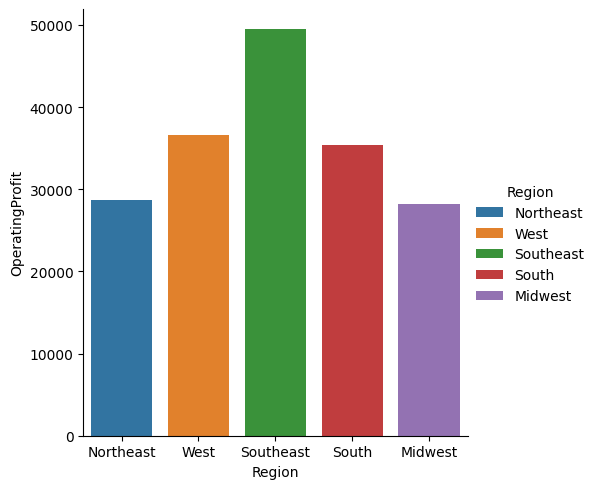

In [67]:
# Display Profit by Region
sns.catplot(data=sales, kind="bar", x="Region", y="OperatingProfit", hue="Region", sharey=False, sharex=False, errorbar=None)

Text(0, 0.5, 'Average Units Sold per Day')

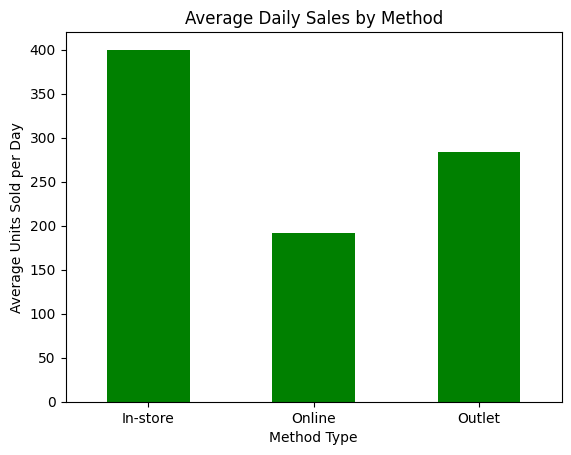

In [60]:
# Find Average Units Per Sale
test = sales.groupby("SalesMethod")["UnitsSold"].sum().reset_index()
test2 = sales.groupby("SalesMethod")["UnitsSold"].count().reset_index()
test["NumberSales"] = test2["UnitsSold"]
test["UnitsPerSale"] = test["UnitsSold"] / test["NumberSales"].astype(float)
test.plot.bar(x='SalesMethod',y='UnitsPerSale',legend=False, color='green')
plt.title('Average Daily Sales by Method')
plt.xlabel('Method Type')
plt.xticks(rotation=360)
plt.ylabel('Average Units Sold per Day')

In [28]:
#made these but not sure if they are useful
#sns.kdeplot(data=sales_states_pivot, x='TotalSales', fill=True)
#sns.kdeplot(data=sales_states_pivot, x='OperatingProfit', fill=True)



<Axes: >

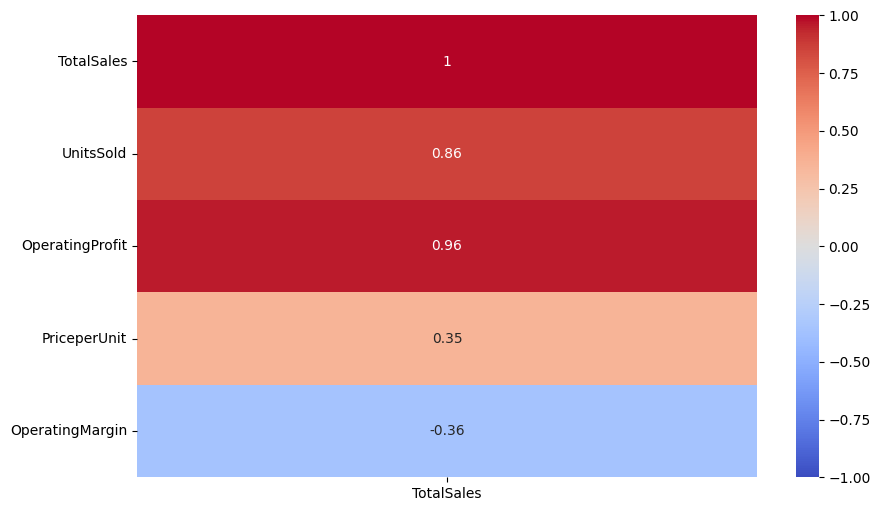

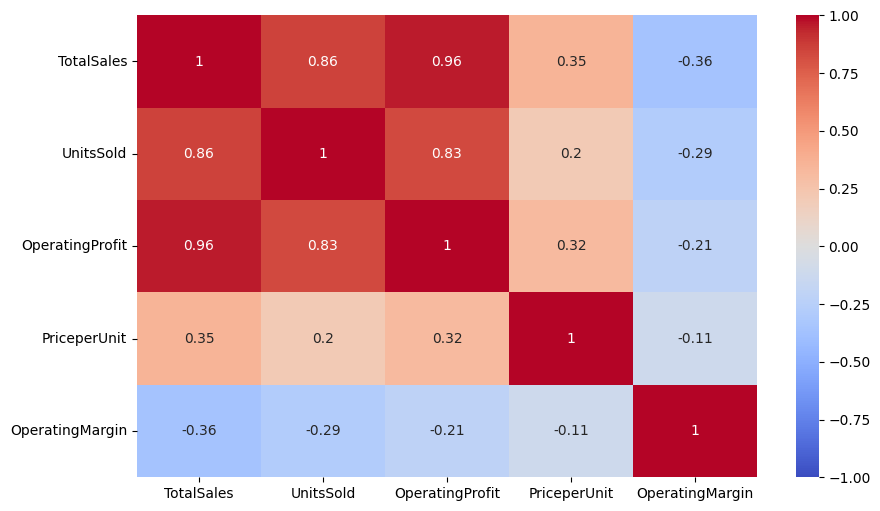

In [29]:
#Trying to see some correlation between the data
sales_salesdata = sales[['TotalSales','UnitsSold','OperatingProfit','PriceperUnit','OperatingMargin']]

#plotting heatmap to focus on TotalSales Column
plt.figure(figsize=(10,6))
sns.heatmap(data=sales_salesdata.corr()[['TotalSales']],cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True)

#plotting heatmap to show all the relationships between the data
plt.figure(figsize=(10,6))
sns.heatmap(data=sales_salesdata.corr(),cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True)


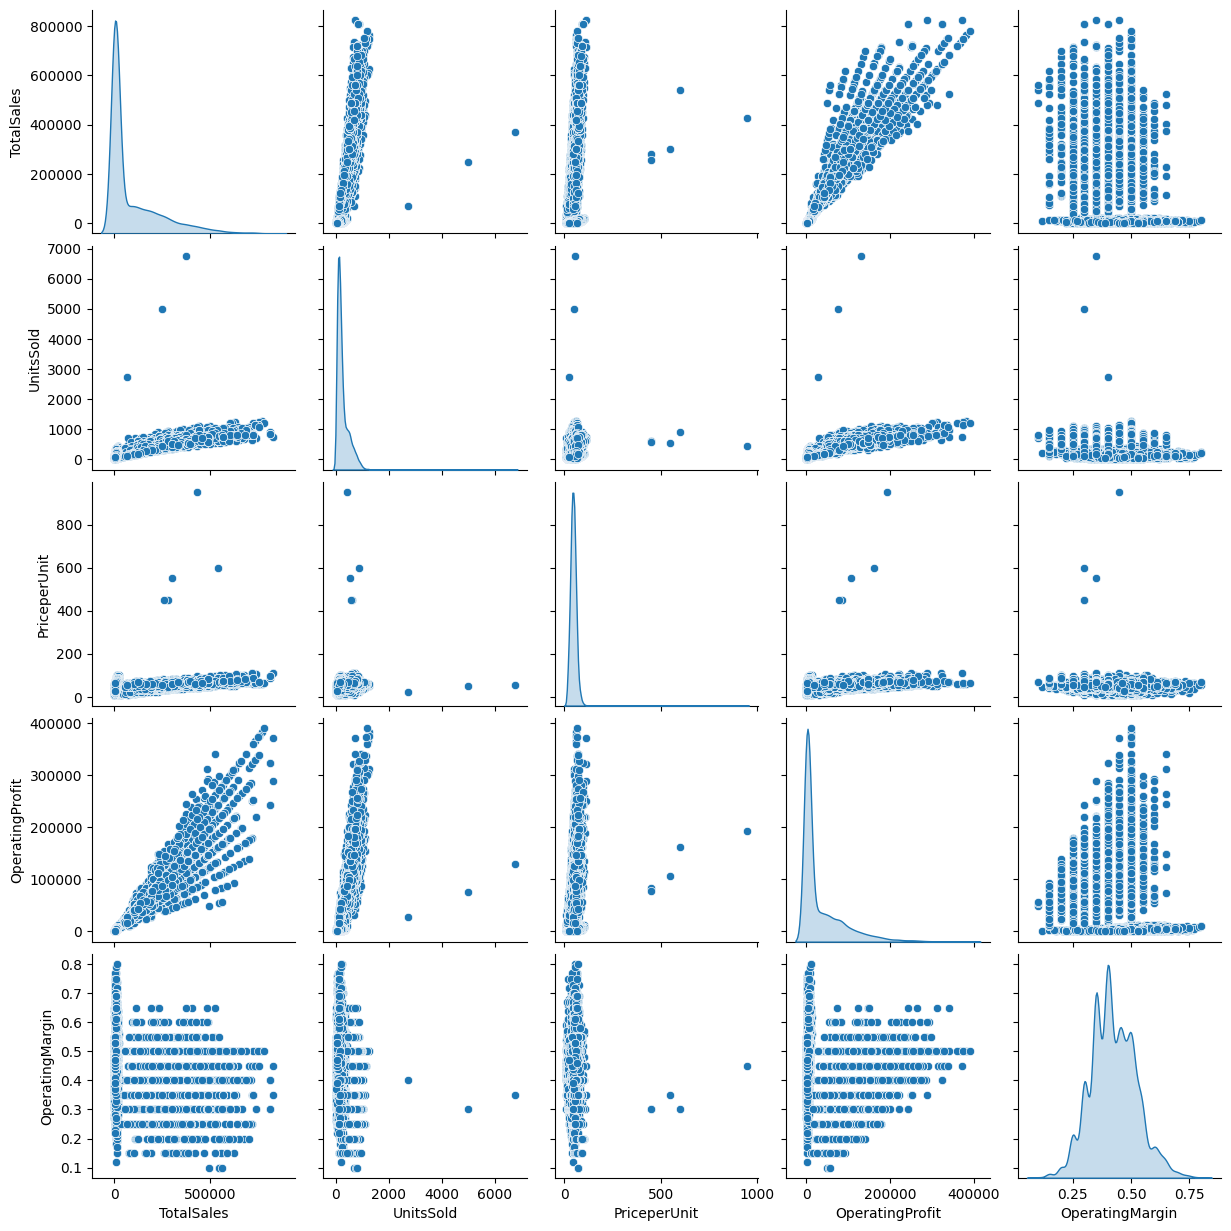

In [30]:
sns.pairplot(data=sales_salesdata,
       y_vars=['TotalSales', 'UnitsSold', 'PriceperUnit','OperatingProfit','OperatingMargin'],
       x_vars=['TotalSales', 'UnitsSold', 'PriceperUnit','OperatingProfit','OperatingMargin'],
       diag_kind='kde')


#use this to find the correlation between the data through the scatter plots